In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3181,ham,"My Parents, My Kidz, My Friends n My Colleague...",NaN,NaN,NaN
765,spam,UR awarded a City Break and could WIN a å£200 ...,NaN,NaN,NaN
4304,ham,Yo come over carlos will be here soon,NaN,NaN,NaN
2323,ham,Sorry dude. Dont know how i forgot. Even after...,NaN,NaN,NaN
5503,ham,Perhaps * is much easy give your account ident...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1 . Data Cleaning
# 2 . EDA
# 3 . Text Preprocessing
# 4 . Model Building
# 5 . Evaluation
# 6 . Improvement
# 7 . Deployment

## 1.Data Cleaning

In [6]:
# removing not useful columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , inplace = True);

In [9]:
df.sample(5)

,v1,v2
589,ham,"I'm in a meeting, call me later at"
1786,ham,Do you know why god created gap between your f...
2989,ham,"Love isn't a decision, it's a feeling. If we c..."
2756,ham,Have a good trip. Watch out for . Remember whe...
2473,ham,Ok lor wat time Ì_ finish?


In [10]:
# renaming the columns

In [11]:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
2123,spam,+123 Congratulations - in this week's competit...
4534,ham,IM LATE TELLMISS IM ON MY WAY
2038,ham,Hey are we going for the lo lesson or gym?
4176,ham,Ok lor then we go tog lor...
1931,ham,What pa tell me.. I went to bath:-)


In [12]:
# encoding target column

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head() # 0 means not spam , 1 means spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# checking for null values

In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# checking for duplicates

In [19]:
df.duplicated().sum()

np.int64(403)

In [20]:
# removing duplicates

In [21]:
df = df.drop_duplicates()

In [22]:
df.duplicated().sum()

np.int64(0)

## EDA

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<Axes: ylabel='count'>

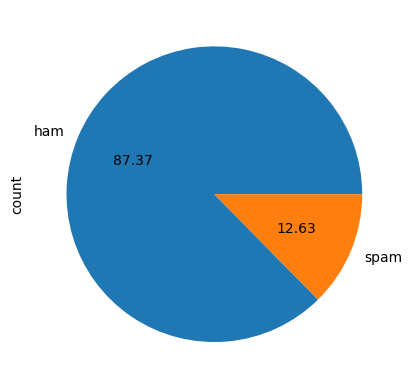

In [25]:
df['target'].value_counts().plot(kind = 'pie',labels = ['ham','spam'],autopct = '%0.2f')

In [26]:
import matplotlib.pyplot as plt

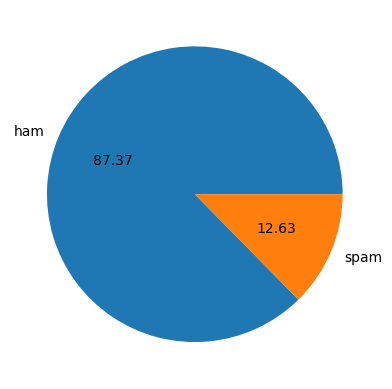

In [27]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [28]:
# Data is imbalanced

In [29]:
# calculating no of characters , numbers and symbols in a msg

In [30]:
# no of characters

In [31]:
!pip install nltk

In [32]:
import nltk

In [33]:
nltk.download('punkt') # download that depenedecies needed to run nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rajvardhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rajvardhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
df['num_characters'] = df['text'].apply(lambda x : len(x))

In [36]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# finding no of words in each text

In [38]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
# finding no of sentences in text

In [41]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
# checking what is going under newly created 3 columns

In [44]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe() # not spam

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe() # spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [47]:
# plotiing a histogram

In [48]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

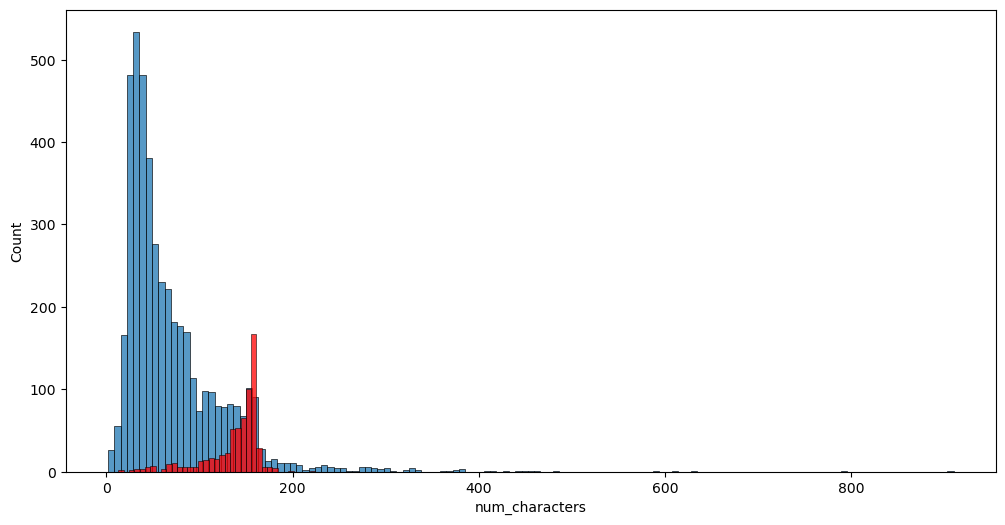

In [49]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

# X-axis → Number of characters in a message

# Y-axis → Count (how many messages

<Axes: xlabel='num_words', ylabel='Count'>

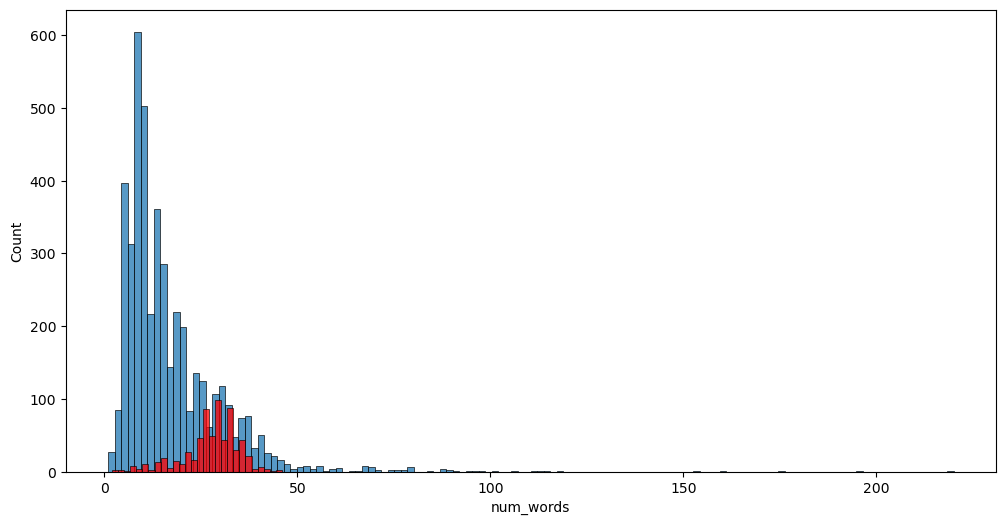

In [50]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

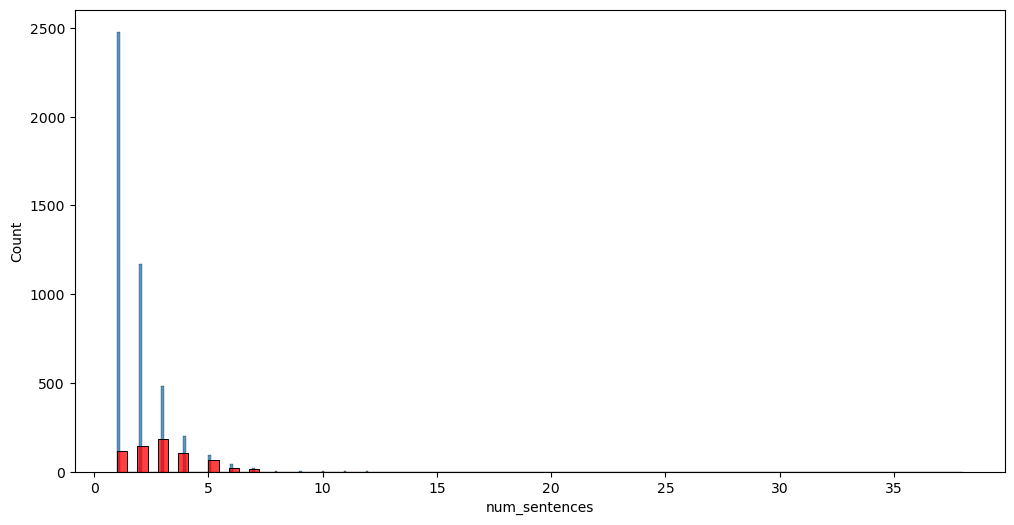

In [51]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color = 'red')

In [52]:
# checking relationship of each column with another column

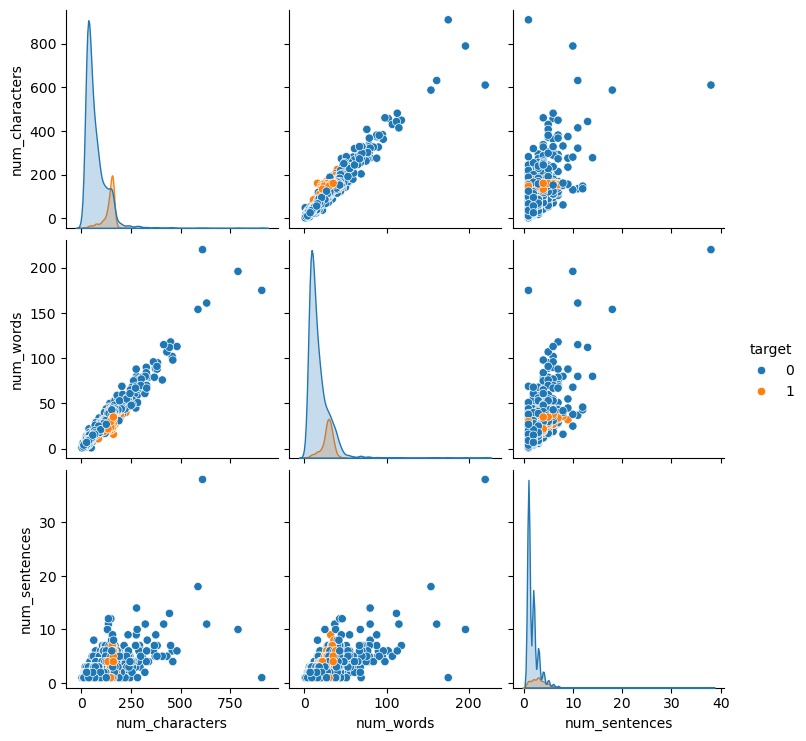

In [53]:
sns.pairplot(df,hue = 'target')

In [54]:
# how they are realted to each other

In [55]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

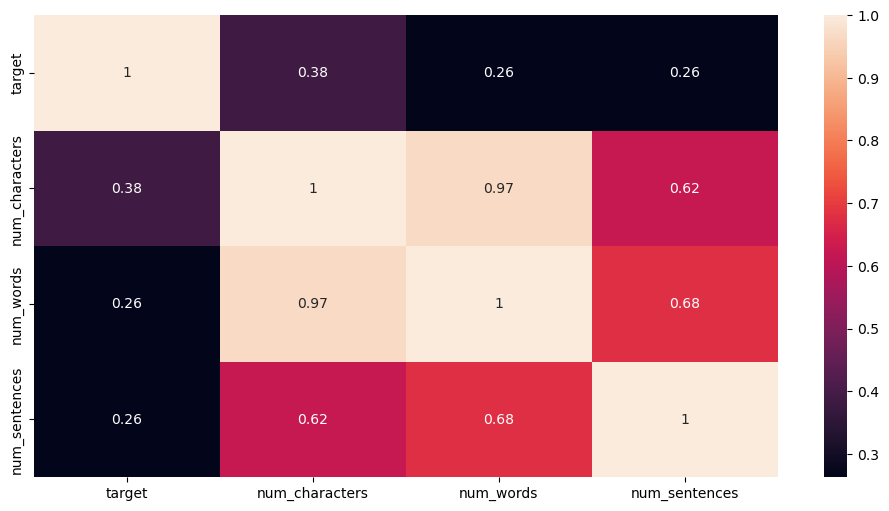

In [56]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(numeric_only=True),annot = True)

## 3.Data Preprocessing

In [57]:
# lower case
# tokenisation
# removing special characters
# stop word removal and punctuation
# lemmitization

In [58]:
# downloading dependencies

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajvardhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [61]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [63]:
ps.stem('singing')

'sing'

In [64]:
def transfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # removing special characters
    ans = []
    for i in text:
        if i.isalnum():
            ans.append(i)

    # removing stop words and punctuation
    text = ans[:]
    ans.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            ans.append(i)

    #stemming
    text = ans[:]
    ans.clear()
    for i in text:
        ans.append(ps.stem(i))

    

            
    return " ".join(ans)

In [65]:
transfrom_text('Hello , I am Rajvardhan and i like to swimming')

'hello rajvardhan like swim'

In [66]:
# df['text'].apply(transfrom_text)

In [67]:
df['transformed_text'] = df['text'].apply(transfrom_text)

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
# displaying which word comes most of the time

In [70]:
!pip install wordcloud

In [71]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 ,min_font_size = 10 , background_color = 'white')

In [72]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

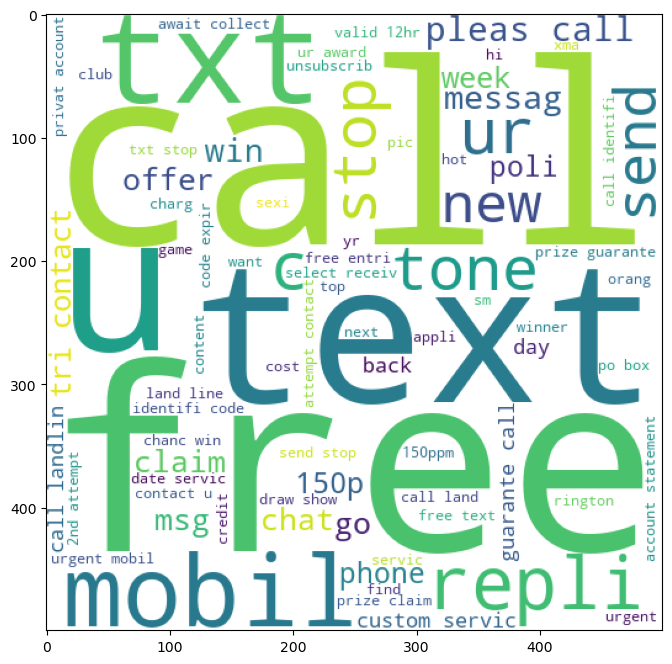

In [73]:
plt.figure(figsize = (15,8))
plt.imshow(spam_wc)

In [74]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

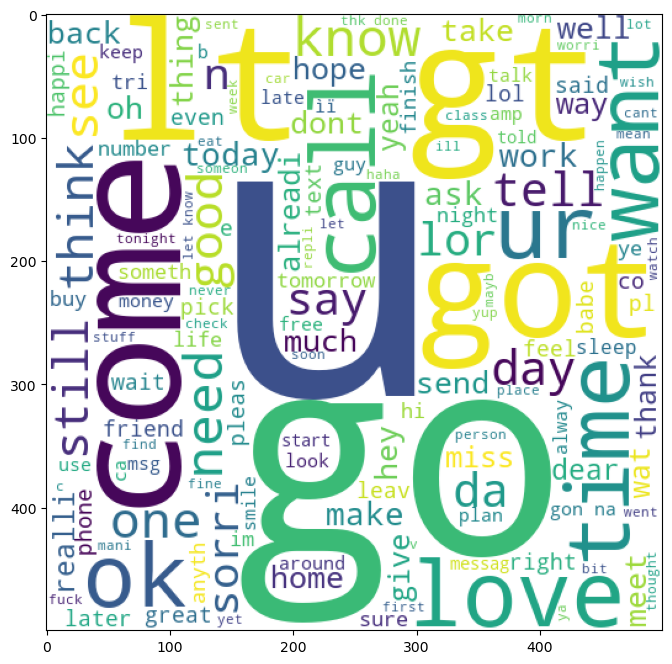

In [75]:
plt.figure(figsize = (15,8))
plt.imshow(ham_wc)

In [76]:
# displaying most common 30 words

In [77]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [78]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [79]:
len(spam_corpus)

9939

In [80]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) # not allowed in new versions

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_13848\2536647634.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='word', y='count',palette = 'hsv')


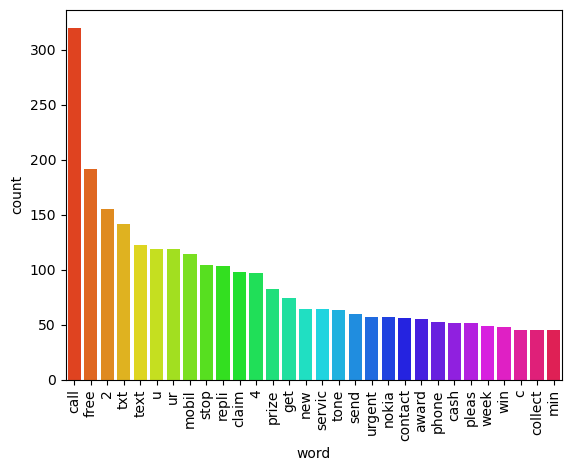

In [81]:
from collections import Counter
new_df = pd.DataFrame(Counter(spam_corpus).most_common(30),
                  columns=['word', 'count'])
sns.barplot(data=new_df, x='word', y='count',palette = 'hsv')
plt.xticks(rotation = 'vertical')
plt.show()

In [82]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [83]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [84]:
len(ham_corpus)

35404

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_13848\3924735482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df1, x='word', y='count',palette='hsv')


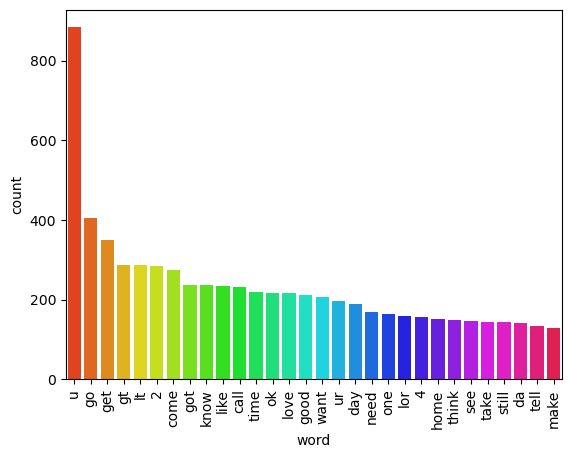

In [85]:
from collections import Counter
new_df1 = pd.DataFrame(Counter(ham_corpus).most_common(30),
                  columns=['word', 'count'])
sns.barplot(data=new_df1, x='word', y='count',palette='hsv')
plt.xticks(rotation = 'vertical')
plt.show()

## 4.Model Building

In [86]:
import sklearn
print(sklearn.__version__)

1.8.0


In [87]:
import sys
print(sys.executable)

C:\Users\Rajvardhan\anaconda3\python.exe


In [88]:
!pip install --upgrade scikit-learn

In [89]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [90]:
x = tfidf.fit_transform( df['transformed_text'] ).toarray()
# M = tfidf.fit_transform( df['transformed_text'] ).toarray()

In [91]:
y = df['target'].values
# N = df['target'].values

In [92]:
x , y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 1, ..., 0, 0, 0]))

In [93]:
# M , N

In [94]:
# trian test split

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix

In [96]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [97]:
# M_train , M_test , N_train , N_test = train_test_split(M , N , test_size = 0.2 , random_state = 2)

In [98]:
from sklearn.naive_bayes import  GaussianNB , MultinomialNB , BernoulliNB 
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:
gnb.fit(x_train , y_train) # cv
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test , y_pred1))
print(precision_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))

0.874274661508704
0.5181818181818182
[[790 106]
 [ 24 114]]


In [100]:
# gnb.fit(M_train , N_train) # tfidf
# N_pred1 = gnb.predict(M_test)
# print(accuracy_score(N_test , N_pred1))
# print(precision_score(N_test , N_pred1))
# print(confusion_matrix(N_test , N_pred1))

In [101]:
mnb.fit(x_train , y_train) # cv
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test , y_pred1))
print(precision_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [102]:
# mnb.fit(M_train , N_train) # tfidf
# N_pred1 = mnb.predict(M_test)
# print(accuracy_score(N_test , N_pred1))
# print(precision_score(N_test , N_pred1))
# print(confusion_matrix(N_test , N_pred1))

In [103]:
bnb.fit(x_train , y_train) # cv
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test , y_pred1))
print(precision_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [104]:
# bnb.fit(M_train , N_train) # tfidf
# N_pred1 = bnb.predict(M_test)
# print(accuracy_score(N_test , N_pred1))
# print(precision_score(N_test , N_pred1))
# print(confusion_matrix(N_test , N_pred1))

In [105]:
# in imbalanced dataset precision matters more than accuracy

In [106]:
# trying on other ml model

In [107]:
# !pip install xgboost

In [108]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [109]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [110]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [111]:
# def train_classifier(clf,x_train,y_train,x_test,y_test):
#     clf.fit(x_train,y_train)
#     y_pred = clf.predict(x_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [112]:
# train_classifier(svc,x_train,y_train,x_test,y_test)

In [113]:
# def train_classifier(clf,M_train,N_train,M_test,N_test):
#     clf.fit(M_train,N_train)
#     N_pred = clf.predict(M_test)
#     accuracy = accuracy_score(N_test,N_pred)
#     precision = precision_score(N_test,N_pred)
    
#     return accuracy,precision

In [114]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [115]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [116]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [117]:
# performance_df1

In [118]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

## 5.Improvement

In [119]:
import pickle

In [120]:
pickle.dump(tfidf , open('vectorizer.pickle','wb'))

In [121]:
pickle.dump(mnb , open('model.pickle','wb'))